**1. The names of team member(s)**

Feilong Wu

**2. How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

This program requires packages including pandas, sqlite3, matplotlib, and numpy (requirements.txt, sqlcm.py, and main.py should be placed in the same directory of this notebook). Clone the repository with HTTPS from GitHub at https://github.com/FeilongWu/inf510_project. If unsure about package installations, one can install the packages with the following command:

$ pip install --user --requirement requirements.txt

To run the code in notebook, one should execute the code in each cell to display the analysis results. An alternative to obtain the analysis results is to run main.py in command line with Python. Once it has been invoked, the program will display the results of data analysis in the forms of text and graph to answer the questions proposed for this project.

**3. Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**

Loading libraries may take a while. Variable names like "func" and "table_name" are overwritten several times in different contexts of data analysis (i.e. "table_name" has different values in processing income vs birth rate and income vs unemployment rate). Note that the last figure is a surface plot, for which the axes for income per capita and median home price do not share the same origin.

**4. Anything else you feel is relevant to the grading of your project your project.**

The database for the final submission is slightly different from that in milestone 2. After realizing that the data of unemployment rate in 2013 is required for data analysis, the new database is extended to include that data and everything else is the same. The code can be run in both notebook and command line using the wu_feilong.ipynb and main.py, respectively. 

**5. What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

This project is about demographics of US counties. Similar to the questions proposed in milestone stone 1, the final project answers the following four questions. The first is to determine the five counties with the highest birth rate. The second and third questions are asking the correlations between income per capita and the two variables birth rate and unemployment rate, respectively. The last question is about how both income per capita and home price contribute to birth rate. 

**6. What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

The counties with the highest birth rate appear to have low population density, especially the one in Alaska. The is a normal pattern observed in nature that a large number of living organisms in a bounded region tend to grow slowly due to the competition for food, water, and living space that keeps them in check. 
The correlation between income per capita and birth rate is low despite whether their values are normalized or not (only the normalized scatter plot is shown), so income may not affect the decision for a person to have a child too much. What is surprising is that the correlation coefficient has a negative sign, for which I expected to be positive since people with higher income may be able to afford the cost for rising more children and therefore would like to have more children. In contrast, the unemployment rate is a good predictor for income per capita due to their relatively high correlation coefficient. Moreover, their correlation coefficient is negative and reasonable that counties with high income per capita are more likely economically advantageous and therefore lower in unemployment rate.
Generally, the counties with higher home price tend to have higher birth rate and vice versa. As mentioned before, the birth rate drops when income per capita increases (nagetive correlation), however, it drops faster in those counties with lower home price than those with higher home price.

**7. What difficulties did you have in completing the project?**

Collecting data is not easy. Although data is abundant given search results, the data source that can satisfy the requirements is not much. The data should be accessible and come from stable sources including institutions and government agencies. Another requirement for data is that data is that it should allow web scrapping or API queries, which is not possible in an interactive table (not encoded in a markup language) or a PDF page (encoded in machine-readable unicode which cannot be decoded to string easily).  It was difficult to obtain the income per capita from 2016 to 2018 from a CSV file as the data was stored in a data table rather than in cells. Unicode is the result of reading the data in traditional ways, which cannot be converted to human-readable strings after many attempts. I finally converted the data table into a data sheet structure by using an external library. Writing the cleaning data into the database is another difficulty due to the diverse raw data formats and uniform database format. For example, the raw data can have different columns of incomes, each of which for a different year, but the database table for income has only one column for all incomes and another column for specifying the corresponding year.  In data analysis, data integration is also difficult. Variables like birth rate is stored in database that a column contains all the values of the feature, but data analysis requires a data frame in which multiple columns contain the same attribute in different years and merge with another feature like income. During this process of data extraction from database and merging data frames, NaN can appear when a county has no value for a particular year. Although NaN can exist for a record, that record should be used in calculating correlation coefficient as long as it has real values for all features of interest in other years rather than the one with NaN.  

**8. What skills did you wish you had while you were doing the project?**

I wish I were able to process unicode. For instance, I could extract a data table from a URL for a PDF opened in a web page. Since the performance of SQL database for big data may be a concern, I wish I could use SQLAlchemy toolkit for constructing and querying database tables. In data visualization, graphs are plotted by the library "matplotlib" and rendered by windows. When the windows are opened, this is may not be attractive since the command line is in a session and cannot receive any input until they are closed. I wish I could use library like "pygal" to render the graphs in a browser so that the user can interact with the command line while keeping the figures. 

**9. What would you do “next” to expand or augment the project?**

Both family and household incomes were collected along with income per capita for 2013, but there is no data for those two in other years. The next thing I would do is to collect data for the two variables to cover at least from 2016 to 2018 so that they can be analyzed with  other features including birth rate. Furthermore, the data for home price has limited coverage of US counties (around 800 counties in total). To improve the reliability of this study, I may learn how to decode unicode so that I would be able to scrape more data from PDFs on the internet. Besides the data source, the code can be improved that some functions can be more versatile by being able to deal with various types of requests. For example, the function for generating select statement used in a database  is limited to a select condition of "equal" because the project does not need conditions other than "equal". In fact, the select condition can include "greater than" or "smaller than", which can be extensions for the function to suffice for future demand. I would compare published statistical report from others with my results to confirm my conclusion or generate new findings.    


# Data Analysis for Final Project

**Run the following cell to import libraries and have the functions and variables in memory**

In [1]:
from main import *

The database has data about demographics of US counties, among which the most important variables are income per capita, birth rate, unemployment rate, and median home price. The data analysis will explore these variables. The first task is to find the counties with the highest birth rate in recent years (2016-2018), with which the selection criteria is average three-year birth rate.

In [2]:
db=sql.connect(database) # connect to database
cur=db.cursor()
table_name='Birth_rate'
years=[2013,2016,2017,2018]
attributes=attr_names(db,table_name) # get the list of column names
attr_ct,attr_br,attr_yr,attr_id='county','birth_rate','year','id'
# get the data frame for birth rate
birth_rate=get_year_specific(db,cur,years,table_name,attr_br,attr_ct)
# find the index of a column
county_idx,br_idx=attributes.index(attr_ct),attributes.index(attr_br) 
cur.execute(*select_statement(table_name,[attr_ct]))
county=[]
for i in cur.fetchall():
    # i = a list of all values in a row: [id, county, birth rate...]
    county.append(i[county_idx])
county=list(set(county)) # remove duplicates
start_yr,end_yr=2016,2018
birth_rates={} # {county1:[rate yr1,rate yr2...]...}
for i in county:
    birth_rates[i]=[]
for i in range(start_yr,end_yr+1):
    for j in birth_rates:
        cur.execute(*select_statement(table_name,[attr_ct,'year'],j,i,select=[attr_br]))
        try:
            birth_rates[j].append(cur.fetchone()[0]) # fill in birth rates for each county
        except:
            birth_rates[j].append(None)
for i in birth_rates:
    if None in birth_rates[i]:
        birth_rates.pop(i) # remove county with None value
    else:
        birth_rates[i]=sum(birth_rates[i])/len(birth_rates[i]) # calculate the mean
birth_county=[] # takes the form [(birth rate1,county1),...]
for ct,br in birth_rates.items():
    birth_county.append((br,ct))
birth_county=sorted(birth_county)
num=5 # the number of counties
county_num=[]# store the foreign keys
birth_county.reverse()
for i in birth_county[0:num]:
    county_num.append(i[1])    
county_state=get_county_state(database,county_num)
# print the results of counties
print(f'The {num} state(s) with the fastest growing population is(are):')
for i in county_state:
    print(i)

The 5 state(s) with the fastest growing population is(are):
Geary county, Kansas
Madison county, Idaho
Todd county, South dakota
Dewey county, South dakota
Bethel census area, Alaska


It seems that they all have low population density. Next, we will investigate the relationship between birth rate and income per capita.

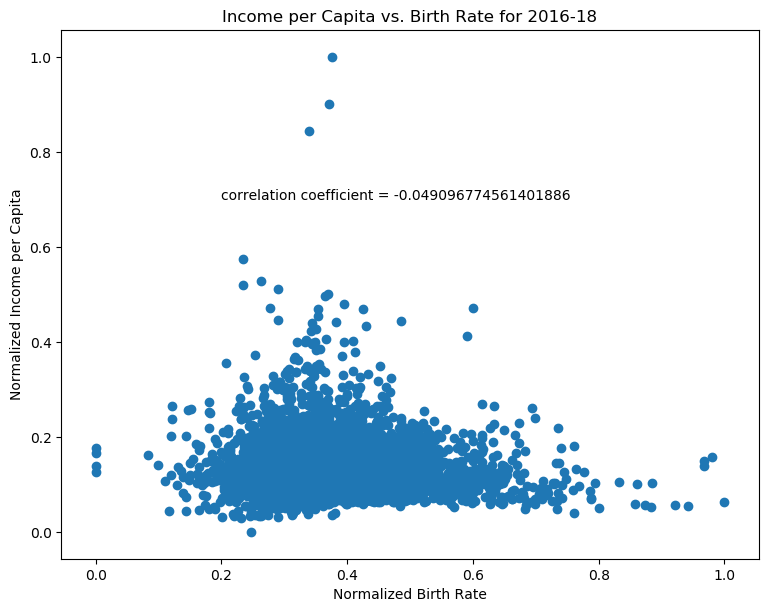

In [3]:
table_name='Income_per_capita'
attr_income='per_capita_income'
# get the data frame for income per capita
joint_income=get_year_specific(db,cur,years,table_name,attr_income,attr_ct)
# join both income and birth rate data frames
joint_income_birth=joint_income.join(birth_rate)
# make a copy before normalization
joint_income_birth_copy=copy.copy(joint_income_birth)
#joint_income_birth=normalize_df(joint_income_birth)
# get two lists of values in a list. [incomes] corresponds to [birth rates]
extract_income_birth=extract_features(joint_income_birth,years,[attr_br,attr_income])
clean_val(extract_income_birth) # clean values
# normalize values of income per capita and birth rate
for i in range(len(extract_income_birth)):
    extract_income_birth[i]=normalize(extract_income_birth[i])
# correlation coefficient
corr_income_birth=np.corrcoef(extract_income_birth[0],extract_income_birth[1])[0][1]
plt.figure(1,figsize=(9, 7), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(extract_income_birth[0],extract_income_birth[1])
plt.xlabel('Normalized Birth Rate')
plt.ylabel('Normalized Income per Capita')
plt.title('Income per Capita vs. Birth Rate for 2016-18')
plt.text(0.2,0.7,f'correlation coefficient = {corr_income_birth}')
plt.show()

The correlation between these two variables is low. Note that the sign of the correlation coefficient is negative. We will see the relationship between income per capita and unemployment rate next.

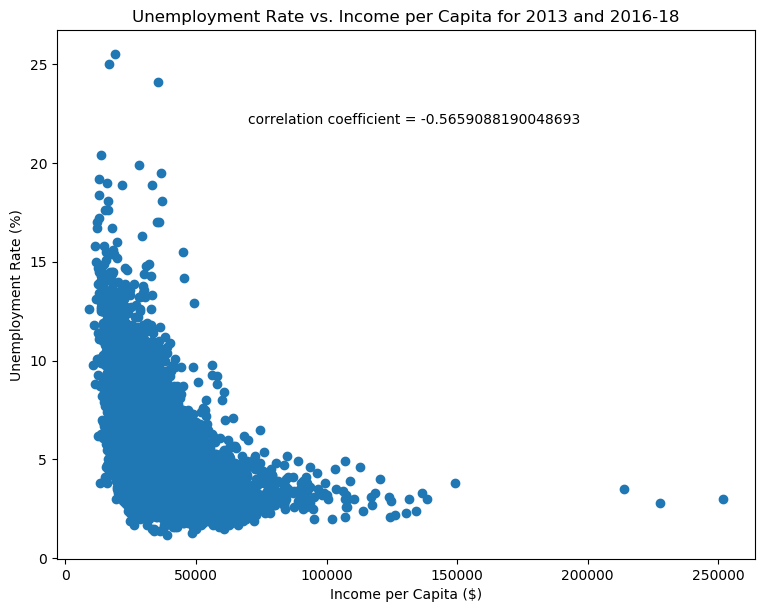

In [4]:
table_name='Unemployment'
attr_ep='unemployment_rate'
# get data frame for unemployment rate
joint_unemploy=get_year_specific(db,cur,years,table_name,attr_ep,attr_ct)
# join the two data frames
joint_income_unemploy=joint_income.join(joint_unemploy)
# get two lists of values in a list. [incomes] corresponds to [unemployment rates]
extract_income_unemploy=extract_features(joint_income_unemploy,years,[attr_income,attr_ep])
clean_val(extract_income_unemploy) # clean values
    # correlation coefficient
corr_income_unemploy=np.corrcoef(extract_income_unemploy[0],extract_income_unemploy[1])[0][1]
plt.figure(2,figsize=(9, 7), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(extract_income_unemploy[0],extract_income_unemploy[1])
plt.xlabel('Income per Capita ($)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate vs. Income per Capita for 2013 and 2016-18')
plt.text(7e04,22,f'correlation coefficient = {corr_income_unemploy}')
plt.show()

The correlation between these two variable is relatively high. Let's add a regression line to this figure. 

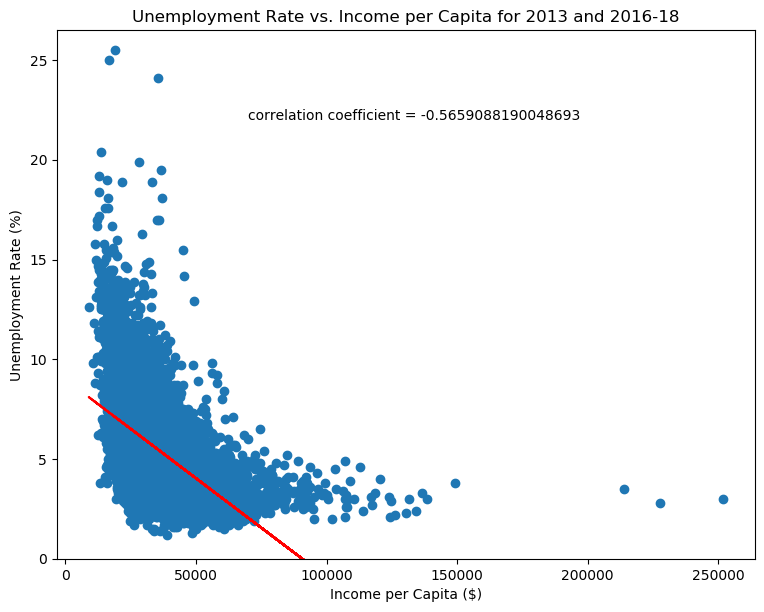

In [5]:
func=lambda x,a,b: a*x+b # linear regression line
# get parameters in regression line
a,b = np.polyfit(extract_income_unemploy[0],extract_income_unemploy[1], 1)
plt.figure(3,figsize=(9, 7), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(extract_income_unemploy[0],extract_income_unemploy[1],'o',extract_income_unemploy[0],\
        list(func(np.array(extract_income_unemploy[0]),a,b)),'-r')
plt.ylim(0,max(extract_income_unemploy[1])+1)
plt.xlabel('Income per Capita ($)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate vs. Income per Capita for 2013 and 2016-18')
plt.text(7e04,22,f'correlation coefficient = {corr_income_unemploy}')
plt.show()

The regression line may look weird, which is probably because the majority of the points reside at the bottom cluster. What we will see next is the interaction among three variables, which are income per capita, birth rate, and home price.

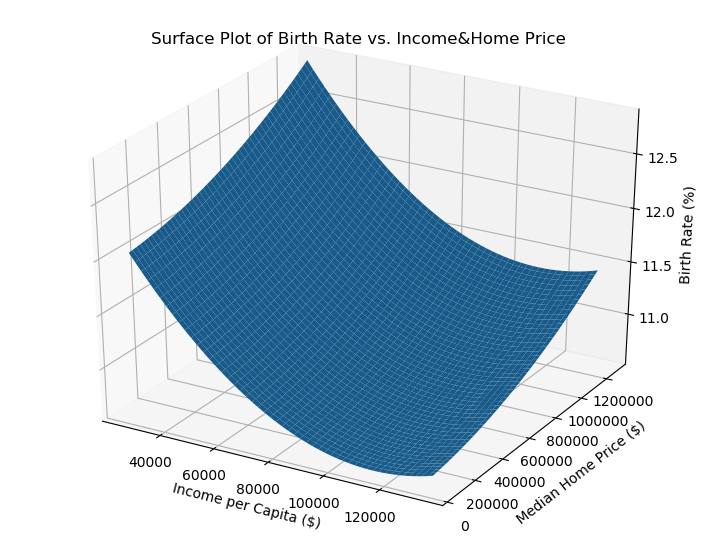

In [26]:
table_name='Home_price'
attr_pr='home_price'
column_order=[attr_br,attr_income,attr_pr]
# get data frame for home price
joint_price=get_year_specific(db,cur,years,table_name,attr_pr,attr_ct)
# join the data frames for the three variables
joint_income_birth_price=joint_income_birth_copy.join(joint_price)
# get three lists of values in a list. [birth rates] corresponds to [income per capita] and [home price]
extract_income_birth_price=extract_features(joint_income_birth_price,years,\
                                          column_order)
clean_val(extract_income_birth_price)
# fit this anonymous function:
# birth rate = a*income**2+b*income+c*home price**2+d*home prince+e
func=lambda xy,a,b,c,d,e:a*xy[0]**2+b*xy[0]+c*xy[1]**2+d*xy[1]+e
x_income=np.array(extract_income_birth_price[column_order.index(attr_income)])
y_price=np.array(extract_income_birth_price[column_order.index(attr_pr)])
z_birth=np.array(extract_income_birth_price[column_order.index(attr_br)])
p0=0.00002,-0.0003,0.000003,-0.00005,0.3 #initial guess for a,b,c,d,e
p1=curve_fit(func,(x_income,y_price),z_birth,p0) # fit values                   
num=200 # number of generated points
# get the 2D array for surface plot
X_income,Y_price=np.meshgrid(np.linspace(min(x_income),max(x_income),num),\
                                np.linspace(min(y_price),max(y_price),num))
Z_birth=func((X_income.ravel(),Y_price.ravel()),*p1[0]).reshape(X_income.shape)
fig=plt.figure(4,figsize=(9, 7), dpi= 100, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X_income,Y_price,Z_birth)
ax.set_xlabel('Income per Capita ($)')
ax.set_ylabel('\n Median Home Price ($)')
ax.set_zlabel('Birth Rate (%)')
ax.set_title('Surface Plot of Birth Rate vs. Income&Home Price')
plt.show()

This confirms the previous result regarding the correlation between income per capita and birth rate. The rate at which birth rate drops due to increasing income per capita is subject to median home price.